# 1. Network Exploration

This notebook contains the network exploration of the Swiss train network.
In section 1, we apply various network analysis techniques.
In section 2, we plot the network using the coordinates of each station on top of a Swiss map.

The graph is loaded from the `data/sbb.edgelist`.
We provide the edge list with the project.  
To reproduce the pre-processing steps, you can create the edge list yourself with the `create_edgelist.py` script.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.read_edgelist("data/sbb.edgelist", delimiter=";", create_using=nx.Graph)

print(f"number of nodes: {len(G.nodes)}")
print(f"number of edges: {len(G.edges)}")

number of nodes: 3152
number of edges: 4678


## 1.1 Degrees: Minimum and Maximum

In [3]:
degrees = dict(G.degree())

sorted_degrees = sorted(degrees.items(), key=lambda x: x[1])

In [4]:
# min degree
min_degree = sorted_degrees[0]
print(f"Minimum degree: {min_degree[0]} with degree {min_degree[1]}")

# max degree
max_degree = sorted_degrees[-1]
print(f"Maximum degree: {max_degree[0]} with degree {max_degree[1]}")

# top 10 min degree
bottom10_min_degree = sorted_degrees[0:10]

# top 10 max degree
top10_max_degree = sorted_degrees[-10:]

print(f"Top 10 highest degree: {top10_max_degree}\n")
print(f"Bottom 10 lowest degrees: {bottom10_min_degree}\n")

min_degree_nodes = [k for (k, v) in sorted_degrees if v == 1]
print("Number of stations with degree of 1:", len(min_degree_nodes))

Minimum degree: Laufenburg with degree 1
Maximum degree: Lyon Part Dieu with degree 40
Top 10 highest degree: [('Winterthur', 19), ('Nancy', 20), ('Luzern', 21), ('Dijon', 22), ('Paris Gare de Lyon', 24), ('Olten', 25), ('Bern', 27), ('Strasbourg', 27), ('Zürich HB', 36), ('Lyon Part Dieu', 40)]

Bottom 10 lowest degrees: [('Laufenburg', 1), ('Genève-Aéroport', 1), ('Zürich HB SZU', 1), ('Uetliberg', 1), ('Milano Porta Garibaldi', 1), ('Orbe', 1), ('Ste-Croix', 1), ('St. Urban Ziegelei', 1), ('Einsiedeln', 1), ('Menziken', 1)]

Number of stations with degree of 1: 123


## 1.2 Centrality Measures

### 1.2.1 Betweeness Centrality

Node with high betweeness centrality are the node that acts as a bridge, broker or gatekeeper.
The largest stations of Switzerland have a high betweeness, because most trains stop there. 
Interestingly, we also find stations in France. This is because Swiss Train companies operate there as well. 

In [5]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
sorted_betweeness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

In [6]:
num = 5 # adjust this variable to get more or less nodes

top_betweenness_centrality = sorted_betweeness_centrality[0:num]
bottom_betweenness_centrality = sorted_betweeness_centrality[-num:]

print(f"Top {num} betweeness centrality score: {top_betweenness_centrality}\n")
print(f"Bottom {num} betweness centrality score: {bottom_betweenness_centrality}\n")

# find all nodes w with a betweenness centrality of 0
min_centrality_nodes = [k for (k, v) in sorted_betweeness_centrality if v == 0]
print("Number of 'rural' stations:", len(min_centrality_nodes))

Top 5 betweeness centrality score: [('Zürich HB', 0.3965608849545719), ('Basel SBB', 0.3477097260552382), ('Mulhouse', 0.31792958062710336), ('Paris Gare de Lyon', 0.18767466843442826), ('Bern', 0.1718813022347316)]

Bottom 5 betweness centrality score: [('Korntal', 0.0), ('Rudersberg-Oberndorf', 0.0), ('Schorndorf', 0.0), ('Neuffen', 0.0), ('Nürtingen', 0.0)]

Number of 'rural' stations: 554


### 1.2.2 Closeness Centrality

A central node is one that is close on average to every other nodes.

In [7]:
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

In [8]:
num = 5 # adjust this variable to get more or less nodes

top_closeness_centrality = sorted_closeness_centrality[0:num]
bottom_closeness_centrality = sorted_closeness_centrality[-num:]

print(f"Top {num} closeness centrality score: {top_closeness_centrality}\n")
print(f"Bottom {num} closeness centrality score: {bottom_closeness_centrality}\n")

# find all nodes w with a closeness centrality close to 0
min_closeness_nodes = [k for (k, v) in sorted_closeness_centrality if v < 0.001]
print("Number of 'rural' stations:", len(min_closeness_nodes))

Top 5 closeness centrality score: [('Zürich HB', 0.1482759195713147), ('Basel SBB', 0.1456206556766508), ('Olten', 0.1435782292914516), ('Mulhouse', 0.1420661357349373), ('Zürich Altstetten', 0.14072262250823464)]

Bottom 5 closeness centrality score: [('Korntal', 0.0005440449743845491), ('Neuffen', 0.0005440449743845491), ('Nürtingen', 0.0005440449743845491), ('Pied du barrage', 0.00031735956839098697), ('Les Montuires', 0.00031735956839098697)]

Number of 'rural' stations: 65


### 1.2.3 Adamic-Adar 

In [9]:
from itertools import combinations

perms = list(combinations(G.nodes, 2))
preds = nx.adamic_adar_index(G, perms)

min_sim = np.inf
min_tuple = []
max_sim = 0
max_tuple = []

for u, v, p in preds:
    if p < min_sim:
        min_sim = p
        min_tuple = [u,v]
    elif p > max_sim:
        max_sim = p
        max_tuple = [u,v]


print(f"Minimum similarity:{min_tuple}, with a value of {min_sim}")
print(f"maximum similarity:{max_tuple}, with a value of {max_sim}")

Minimum similarity:['Luzern', 'Cham Alpenblick'], with a value of 0
maximum similarity:['Olten', 'Aarau'], with a value of 4.135539724611722


# 2. Graph Visualization

Below are visualization of the graph made with NetworkX, GeoPandas and Matplotlib on top of a map of Switzerland.

**Important**: to run this code, you need to download the GeoPackage of the swiss boundaries from swisstopo.
The archive is available on [swisstopo.admin.ch](https://www.swisstopo.admin.ch/de/landschaftsmodell-swissboundaries3d#swissBOUNDARIES3D---Download).
Once downloaded, unzip it as `data/swiss-boundaries.gpkg` or adjust the path in the cell below.

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
from contextily import add_basemap, providers

# load the swiss boundaries data
# make sure you downloaded the boundaries from swisstopo
swiss_boundaries_gdf = gpd.read_file("data/swiss-boundaries.gpkg")
swiss_boundaries_gdf["geometry"] = swiss_boundaries_gdf["geometry"].simplify(0.5) 

swiss_boundaries_gdf = swiss_boundaries_gdf.to_crs(epsg=3857)
swiss_boundaries_gdf = swiss_boundaries_gdf[swiss_boundaries_gdf["typ"] != "k_W"]

# load and construct the stations coordinates
stations_gdf = gpd.read_file('data/stations.geojson')
stations_gdf = stations_gdf.to_crs(epsg=3857)

coordinates = np.column_stack((stations_gdf["geometry"].x, stations_gdf["geometry"].y))
positions = dict(zip(G.nodes, coordinates))

## 2.1 Train Network Map Plot

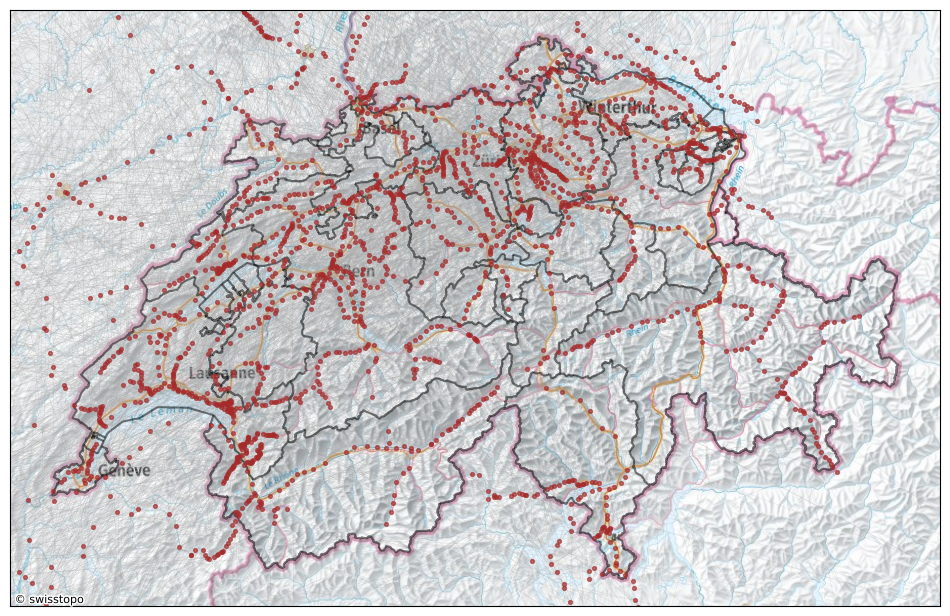

In [11]:
# plot kanton lines
ax = swiss_boundaries_gdf.plot(figsize=(12, 12), alpha=0.5, edgecolor="k")
# plot the map of switzerland in the background
add_basemap(ax, source=providers.SwissFederalGeoportal.NationalMapColor)

nx.draw_networkx(G, positions, ax=ax, with_labels=False, 
                 node_color="brown", node_size=7.5, alpha=0.66,
                edge_color="darkgrey",  width=0.15
)
plt.show()

## 2.2 Swiss Map Plot with Node Degrees

This version uses the node degrees for the node size, to highlight stations with more connections.

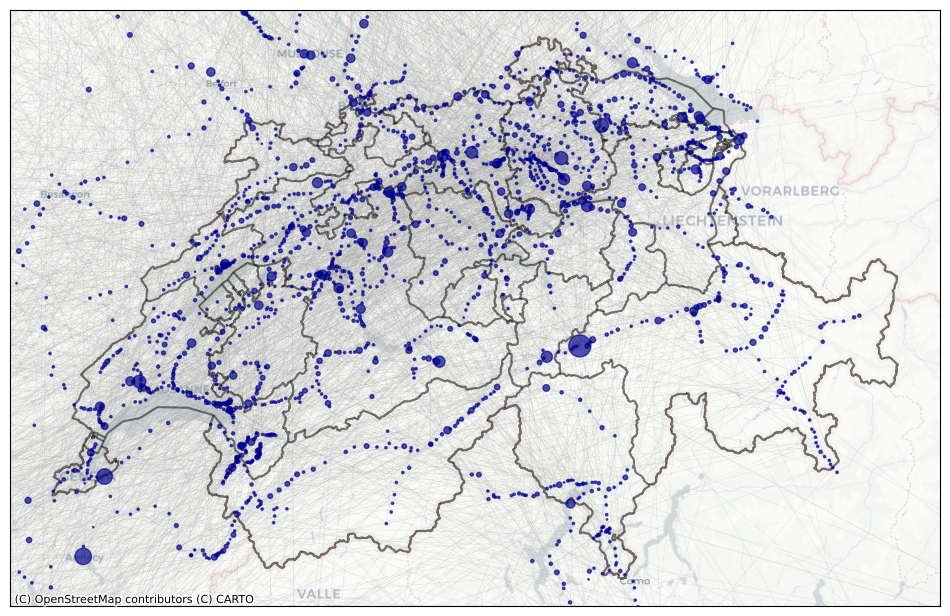

In [12]:
node_size = [x ** (1.5) for x in degrees.values()]

ax = swiss_boundaries_gdf.plot(figsize=(12, 10), alpha=0.5, edgecolor="k")
# plot the map of switzerland in the background 
add_basemap(ax, source=providers.CartoDB.Positron)

nx.draw_networkx(G, positions, ax=ax, with_labels=False, 
                node_color="darkblue", node_size=node_size, alpha=0.66,
                edge_color="darkgrey",  width=0.125
)

plt.show()